In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pd.options.display.max_columns = 999

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [70]:
df_pizza = pd.read_csv("D:\\CAP4910(2)\Project1\Pizza.csv", encoding='utf-8')
print(df_pizza)


     A  14069  27.82  21.43  44.87  5.11  1.77   0.77  4.93
0    A  14053  28.49  21.26  43.89  5.34  1.79   1.02  4.84
1    A  14025  28.35  19.99  45.78  5.08  1.63   0.80  4.95
2    A  14016  30.55  20.15  43.13  4.79  1.61   1.38  4.74
3    A  14005  30.49  21.28  41.65  4.82  1.64   1.76  4.67
4    A  14075  31.14  20.23  42.31  4.92  1.65   1.40  4.67
..  ..    ...    ...    ...    ...   ...   ...    ...   ...
294  J  34044  44.91  11.07  17.00  2.49  0.66  25.36  2.91
295  J  24069  43.15  11.79  18.46  2.43  0.67  24.17  3.10
296  J  34039  44.55  11.01  16.03  2.43  0.64  25.98  2.92
297  J  14044  47.60  10.43  15.18  2.32  0.56  24.47  2.76
298  J  14045  46.84   9.91  15.50  2.27  0.57  25.48  2.81

[299 rows x 9 columns]


In [71]:
df_pizza.columns = ['brand','id','mois','prot','fat','ash','sodium','carb','cal']

df_pizza.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
1,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
2,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
3,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
4,A,14075,31.14,20.23,42.31,4.92,1.65,1.40,4.67


In [46]:
df_pizza.dtypes

brand      object
id          int64
mois      float64
prot      float64
fat       float64
ash       float64
sodium    float64
carb      float64
cal       float64
dtype: object

In [72]:
df_pizza.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
1,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
2,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
3,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
4,A,14075,31.14,20.23,42.31,4.92,1.65,1.40,4.67


In [73]:
from sklearn.preprocessing import LabelEncoder

# Label encoding with sklearn's LabelEncoder
le = LabelEncoder()
df_pizza.brand = le.fit_transform(df_pizza.brand)
df_pizza

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,0,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
1,0,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
2,0,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
3,0,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
4,0,14075,31.14,20.23,42.31,4.92,1.65,1.40,4.67
...,...,...,...,...,...,...,...,...,...
294,9,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
295,9,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
296,9,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
297,9,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [74]:
from sklearn.model_selection import train_test_split

X, y = df_pizza.iloc[:, 0:].values, df_pizza.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [79]:
X_train

array([[4.0000e+00, 2.4140e+04, 3.4230e+01, ..., 4.4000e-01, 3.8470e+01,
        3.4600e+00],
       [4.0000e+00, 1.4126e+04, 3.7780e+01, ..., 4.9000e-01, 3.9230e+01,
        3.0800e+00],
       [8.0000e+00, 3.4023e+04, 5.4360e+01, ..., 4.8000e-01, 1.8880e+01,
        2.3900e+00],
       ...,
       [7.0000e+00, 1.4111e+04, 3.5610e+01, ..., 4.0000e-01, 3.8810e+01,
        3.3300e+00],
       [1.0000e+00, 2.4049e+04, 5.0870e+01, ..., 1.1000e+00, 3.9300e+00,
        3.2000e+00],
       [1.0000e+00, 3.4011e+04, 5.3980e+01, ..., 9.2000e-01, 3.9200e+00,
        2.9400e+00]])

In [80]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [81]:
X_train_std

array([[-0.1894875 ,  0.42219101, -0.70382786, ..., -0.62783985,
         0.86440955,  0.30876892],
       [-0.1894875 , -1.04106675, -0.33052826, ..., -0.49058198,
         0.90648412, -0.31378573],
       [ 1.20008749,  1.86630689,  1.41293861, ..., -0.51803355,
        -0.22011807, -1.44421391],
       ...,
       [ 0.85269374, -1.04325857, -0.55871421, ..., -0.73764615,
         0.88323238,  0.0957897 ],
       [-1.23166874,  0.40889398,  1.0459483 , ...,  1.18396411,
        -1.04776931, -0.11718952],
       [-1.23166874,  1.86455343,  1.37297978, ...,  0.68983576,
        -1.04832292, -0.54314797]])

In [82]:
X_test_std

array([[ 5.05299994e-01, -1.04822669e+00, -8.23704346e-01,
        -8.53631454e-01, -9.17464057e-01, -9.95732011e-01,
        -6.27839854e-01,  1.25913552e+00, -6.80404728e-02],
       [-1.89487498e-01, -1.04106675e+00, -3.30528255e-01,
        -7.86751030e-01, -8.07404910e-01, -7.82198693e-01,
        -4.90581978e-01,  9.06484125e-01, -3.13785729e-01],
       [ 8.52693740e-01, -1.05114911e+00, -7.54302167e-01,
        -8.22524280e-01, -5.96271035e-01, -1.04318386e+00,
        -7.37646154e-01,  1.05651321e+00,  1.12172715e-01],
       [-1.57906248e+00,  1.86469955e+00, -1.10341616e+00,
         9.98800746e-01,  2.69090370e+00,  1.71693200e+00,
         2.58399444e+00, -1.22160375e+00,  2.50409321e+00],
       [-5.36881244e-01, -1.04252796e+00,  7.03143594e-01,
         1.41252616e+00, -7.06824541e-02,  1.13169253e+00,
        -1.88614651e-01, -9.17670283e-01, -5.92297019e-01],
       [-5.36881244e-01, -1.04077451e+00,  6.29535222e-01,
         1.31142784e+00,  1.04513740e-01,  1.131692

In [83]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.84947374e+00 2.30775980e+00 1.01744016e+00 4.91842843e-01
 2.65428727e-01 8.47598880e-02 2.60737380e-02 4.76908607e-04
 1.34242583e-05]


In [84]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [85]:
var_exp

[0.5362522797097236,
 0.2551908765850495,
 0.11250800264510732,
 0.05438772531357634,
 0.029350970371602843,
 0.00937270425755637,
 0.0028832203645918503,
 5.273630530124182e-05,
 1.4844474909719238e-06]

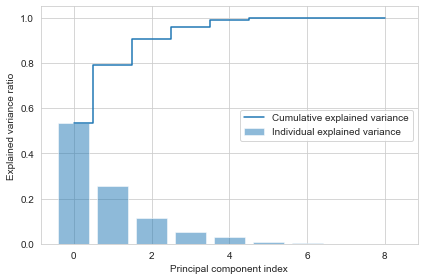

In [88]:
import matplotlib.pyplot as plt


plt.bar(range(0, 9), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0, 9), cum_var_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_02.png', dpi=300)
plt.show()

In [89]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [90]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.38293242 -0.07806353]
 [-0.04716641 -0.00622398]
 [ 0.04721853 -0.63013065]
 [ 0.34821115 -0.28604947]
 [ 0.41871081  0.2053599 ]
 [ 0.43152444 -0.13308537]
 [ 0.40017571  0.17233247]
 [-0.38526202  0.34167517]
 [ 0.23991248  0.55556602]]


In [91]:
 X_train_std[0].dot(w)

array([-1.25042286,  1.11810544])

In [92]:
X_train_pca = X_train_std.dot(w)

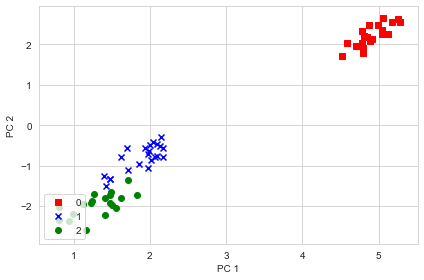

In [93]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers): plt.scatter(X_train_pca[y_train==l, 0],X_train_pca[y_train==l, 1],c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [94]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([5.36252280e-01, 2.55190877e-01, 1.12508003e-01, 5.43877253e-02,
       2.93509704e-02, 9.37270426e-03, 2.88322036e-03, 5.27363053e-05,
       1.48444749e-06])

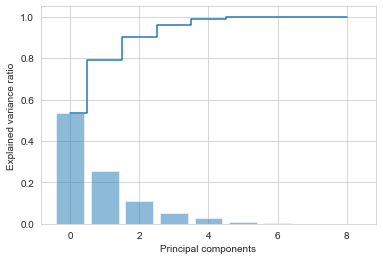

In [96]:
plt.bar(range(0, 9), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(0, 9), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [97]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

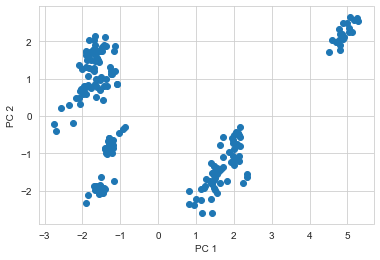

In [98]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [115]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    #marker=markers[idx], 
                    label=cl)

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
# initializing the PCA transformer and
# logistic regression estimator:

pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', random_state=1,solver='lbfgs')

# dimensionality reduction:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)


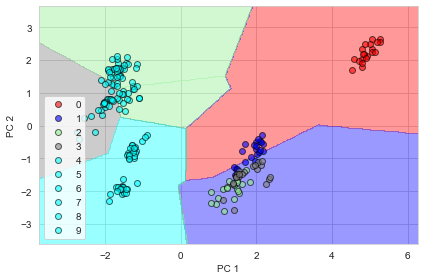

In [117]:
# fitting the logistic regression model on the reduced dataset:
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier = lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

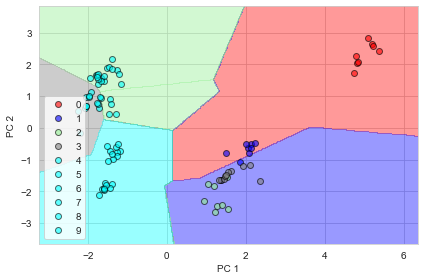

In [118]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_05.png', dpi=300)
plt.show()

In [114]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([5.36252280e-01, 2.55190877e-01, 1.12508003e-01, 5.43877253e-02,
       2.93509704e-02, 9.37270426e-03, 2.88322036e-03, 5.27363053e-05,
       1.48444749e-06])